In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU, ELU
from tensorflow.keras.initializers import he_uniform
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
train_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
test_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [3]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\test\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)
train = test_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\train\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical',batch_size=64,seed=1)

Found 1000 images belonging to 100 classes.
Found 8900 images belonging to 100 classes.


In [4]:
def model_creation():
    
    model = Sequential()
    
    model.add(ZeroPadding2D(padding = (2, 2), input_shape= (48, 48, 3), name="zeropad1"))
    #model.add(Conv2D(4, kernel_size=(2, 2), name='conv0'))
    model.add(Conv2D(8,kernel_size=(5, 5), activation=LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01),kernel_initializer=he_uniform(seed=2) ,name="conv1"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name="maxpool1"))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, kernel_size=(5, 5), activation=LeakyReLU(alpha=0.1),  name="conv2"))
    model.add(Conv2D(32, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01),  name="conv3"))
    #model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name='maxpool2'))
    model.add(BatchNormalization(axis = -1))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation=LeakyReLU(alpha=0.1) ,kernel_regularizer=regularizers.l2(0.01), name='dense1'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation=LeakyReLU(alpha=0.1), name='dense2'))
    model.add(Dense(100, activation="softmax", name='dense3'))
    
    return model

model = model_creation()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zeropad1 (ZeroPadding2D)     (None, 52, 52, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 8)         608       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 8)         32        
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 44, 44, 16)        3216      
_________________________________________________________________
conv3 (Conv2D)               (None, 42, 42, 32)        4

In [5]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(train, steps_per_epoch=200,
                    epochs=200, validation_data=test,
                    validation_steps=80, verbose=1)

Epoch 1/200
200/200 [==============================] - 116s 579ms/step - loss: 23.9330 - accuracy: 0.1122 - val_loss: 22.3058 - val_accuracy: 0.2360
Epoch 2/200
200/200 [==============================] - 112s 560ms/step - loss: 21.6171 - accuracy: 0.2250 - val_loss: 20.5060 - val_accuracy: 0.3072
Epoch 3/200
200/200 [==============================] - 111s 555ms/step - loss: 19.9167 - accuracy: 0.2887 - val_loss: 19.3367 - val_accuracy: 0.2962
Epoch 4/200
200/200 [==============================] - 111s 557ms/step - loss: 18.4463 - accuracy: 0.3352 - val_loss: 17.8187 - val_accuracy: 0.3436
Epoch 5/200
200/200 [==============================] - 112s 558ms/step - loss: 17.0851 - accuracy: 0.3691 - val_loss: 16.5380 - val_accuracy: 0.3920
Epoch 6/200
200/200 [==============================] - 112s 560ms/step - loss: 15.9295 - accuracy: 0.3905 - val_loss: 15.4648 - val_accuracy: 0.3968
Epoch 7/200
200/200 [==============================] - 115s 575ms/step - loss: 14.7935 - accuracy: 0.4148 

200/200 [==============================] - 112s 558ms/step - loss: 2.0758 - accuracy: 0.6695 - val_loss: 2.6359 - val_accuracy: 0.5486
Epoch 57/200
200/200 [==============================] - 111s 555ms/step - loss: 2.0058 - accuracy: 0.6778 - val_loss: 2.8219 - val_accuracy: 0.5084
Epoch 58/200
200/200 [==============================] - 111s 555ms/step - loss: 2.0054 - accuracy: 0.6717 - val_loss: 2.5788 - val_accuracy: 0.5736
Epoch 59/200
200/200 [==============================] - 111s 555ms/step - loss: 1.9895 - accuracy: 0.6766 - val_loss: 2.6727 - val_accuracy: 0.5444
Epoch 60/200
200/200 [==============================] - 111s 557ms/step - loss: 1.9358 - accuracy: 0.6889 - val_loss: 2.7068 - val_accuracy: 0.5476
Epoch 61/200
200/200 [==============================] - 111s 554ms/step - loss: 1.9537 - accuracy: 0.6803 - val_loss: 2.6402 - val_accuracy: 0.5524
Epoch 62/200
200/200 [==============================] - 111s 556ms/step - loss: 1.8708 - accuracy: 0.7003 - val_loss: 2.7363 

200/200 [==============================] - 112s 560ms/step - loss: 1.6868 - accuracy: 0.7383 - val_loss: 2.8588 - val_accuracy: 0.5302
Epoch 112/200
200/200 [==============================] - 112s 561ms/step - loss: 1.7213 - accuracy: 0.7237 - val_loss: 2.6933 - val_accuracy: 0.5560
Epoch 113/200
200/200 [==============================] - 111s 556ms/step - loss: 1.7337 - accuracy: 0.7334 - val_loss: 2.6750 - val_accuracy: 0.5438
Epoch 114/200
200/200 [==============================] - 111s 556ms/step - loss: 1.6874 - accuracy: 0.7380 - val_loss: 2.5513 - val_accuracy: 0.5656
Epoch 115/200
200/200 [==============================] - 111s 554ms/step - loss: 1.7540 - accuracy: 0.7240 - val_loss: 2.6751 - val_accuracy: 0.5592
Epoch 116/200
200/200 [==============================] - 112s 559ms/step - loss: 1.6652 - accuracy: 0.7459 - val_loss: 2.6291 - val_accuracy: 0.5664
Epoch 117/200
200/200 [==============================] - 111s 553ms/step - loss: 1.7587 - accuracy: 0.7231 - val_loss: 2

200/200 [==============================] - 111s 555ms/step - loss: 1.7414 - accuracy: 0.7414 - val_loss: 2.5689 - val_accuracy: 0.5934
Epoch 167/200
200/200 [==============================] - 111s 556ms/step - loss: 1.6490 - accuracy: 0.7648 - val_loss: 2.7808 - val_accuracy: 0.5668
Epoch 168/200
200/200 [==============================] - 111s 557ms/step - loss: 1.6418 - accuracy: 0.7670 - val_loss: 2.6086 - val_accuracy: 0.5930
Epoch 169/200
200/200 [==============================] - 111s 556ms/step - loss: 1.6619 - accuracy: 0.7576 - val_loss: 2.5427 - val_accuracy: 0.6050
Epoch 170/200
200/200 [==============================] - 111s 556ms/step - loss: 1.7287 - accuracy: 0.7480 - val_loss: 2.7232 - val_accuracy: 0.5654
Epoch 171/200
200/200 [==============================] - 111s 556ms/step - loss: 1.6036 - accuracy: 0.7736 - val_loss: 2.6588 - val_accuracy: 0.5704
Epoch 172/200
200/200 [==============================] - 111s 556ms/step - loss: 1.6648 - accuracy: 0.7629 - val_loss: 2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


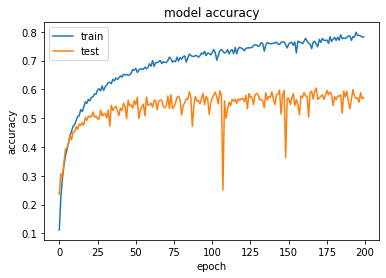

In [52]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

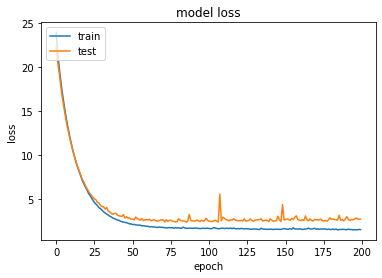

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#Evaluating Model
score  = model.evaluate_generator(test,steps = 100)
#printAccuracy
print("Accuracyloss:-", score[0])
print("AccuracyScore",score[1] )

Accuracyloss:- 2.787321240901947
AccuracyScore 0.568734


In [10]:
import os
model.save(os.getcwd()+"//"+"weights_new.h5")

In [11]:
Y_pred = model.predict_generator(test, 1000 //64+1)
print(Y_pred)

[[2.1541435e-05 1.1622285e-05 1.5051588e-05 ... 2.1533448e-01
  1.0726072e-04 1.4423041e-06]
 [6.5471668e-06 9.2745036e-02 1.2682069e-03 ... 1.0850653e-01
  8.3596841e-02 3.8237991e-05]
 [2.6673666e-10 1.6994511e-04 5.1003404e-02 ... 1.0616905e-08
  7.7089317e-06 6.1837536e-06]
 ...
 [2.4633091e-06 6.5221544e-04 5.3241873e-01 ... 6.0531664e-07
  3.0141746e-04 1.0021353e-05]
 [2.6530387e-14 7.7989654e-10 2.8800320e-11 ... 1.8206842e-10
  2.8469987e-08 8.9757825e-14]
 [8.9080805e-07 5.3371845e-09 8.4938335e-08 ... 1.4226441e-04
  2.1463244e-08 1.1646358e-01]]


In [12]:
import numpy as np
y_pred = np.argmax(Y_pred, axis=1)

#len(y_pred)

print("Validation ", len(test.classes))

for i in range(len(test.classes)):
    pass
    #print(test.classes[i])

Validation  1000


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


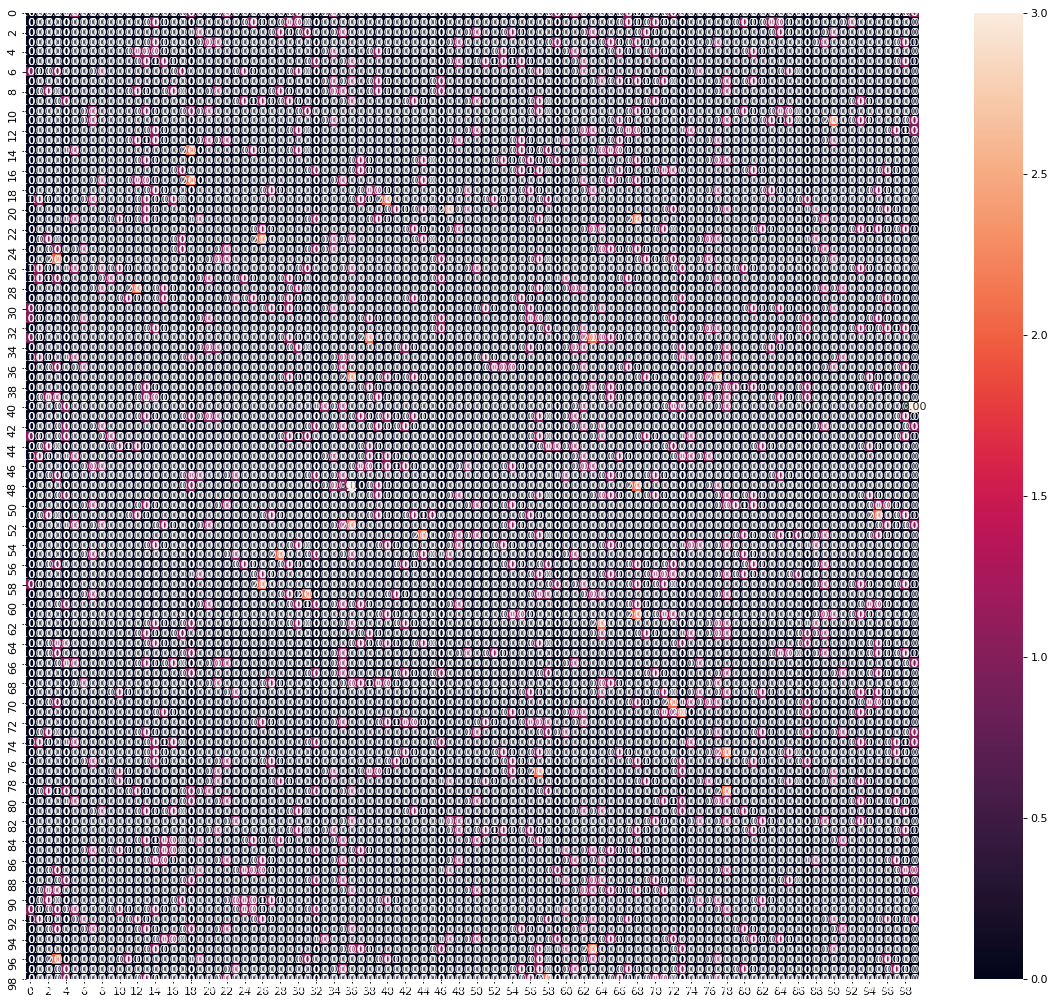

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test.classes, y_pred), fmt='.2f', annot=True))

In [50]:
print(confusion_matrix(test.classes, y_pred))

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [15]:
print('Classification Report')
target_names = [str(x) for x in range(100)]
print(classification_report(test.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
     

In [16]:
from tensorflow.keras.models import Model
from PIL import Image
layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]
#image = cv2.imread("002_201.jpg")
activation_model = Model(inputs=model.input, outputs=layer_outputs)
im = Image.open("002_201.jpg") 
img = im.resize((48, 48))
img = img.save("predict_image.jpg")

In [17]:
image_show = Image.open("002_201.jpg")
image_show.show()

In [18]:
pred_img = image.load_img("predict_image.jpg",target_size=(48, 48))
data_batch = np.asarray(pred_img).reshape((-1, 48, 48,3 )).astype(float)
activations = activation_model.predict(data_batch)

In [20]:
import cv2
final_img = cv2.imread("predict_image.jpg")

final_img = np.asarray(final_img).reshape((-1, 48, 48,3 )).astype(float)
final_pred = model.predict(final_img)

In [21]:
print("Test image Probabilites...........")
#print(final_pred)
test_image = final_pred.argmax(axis=-1)
test_image

Test image Probabilites...........


array([0], dtype=int64)

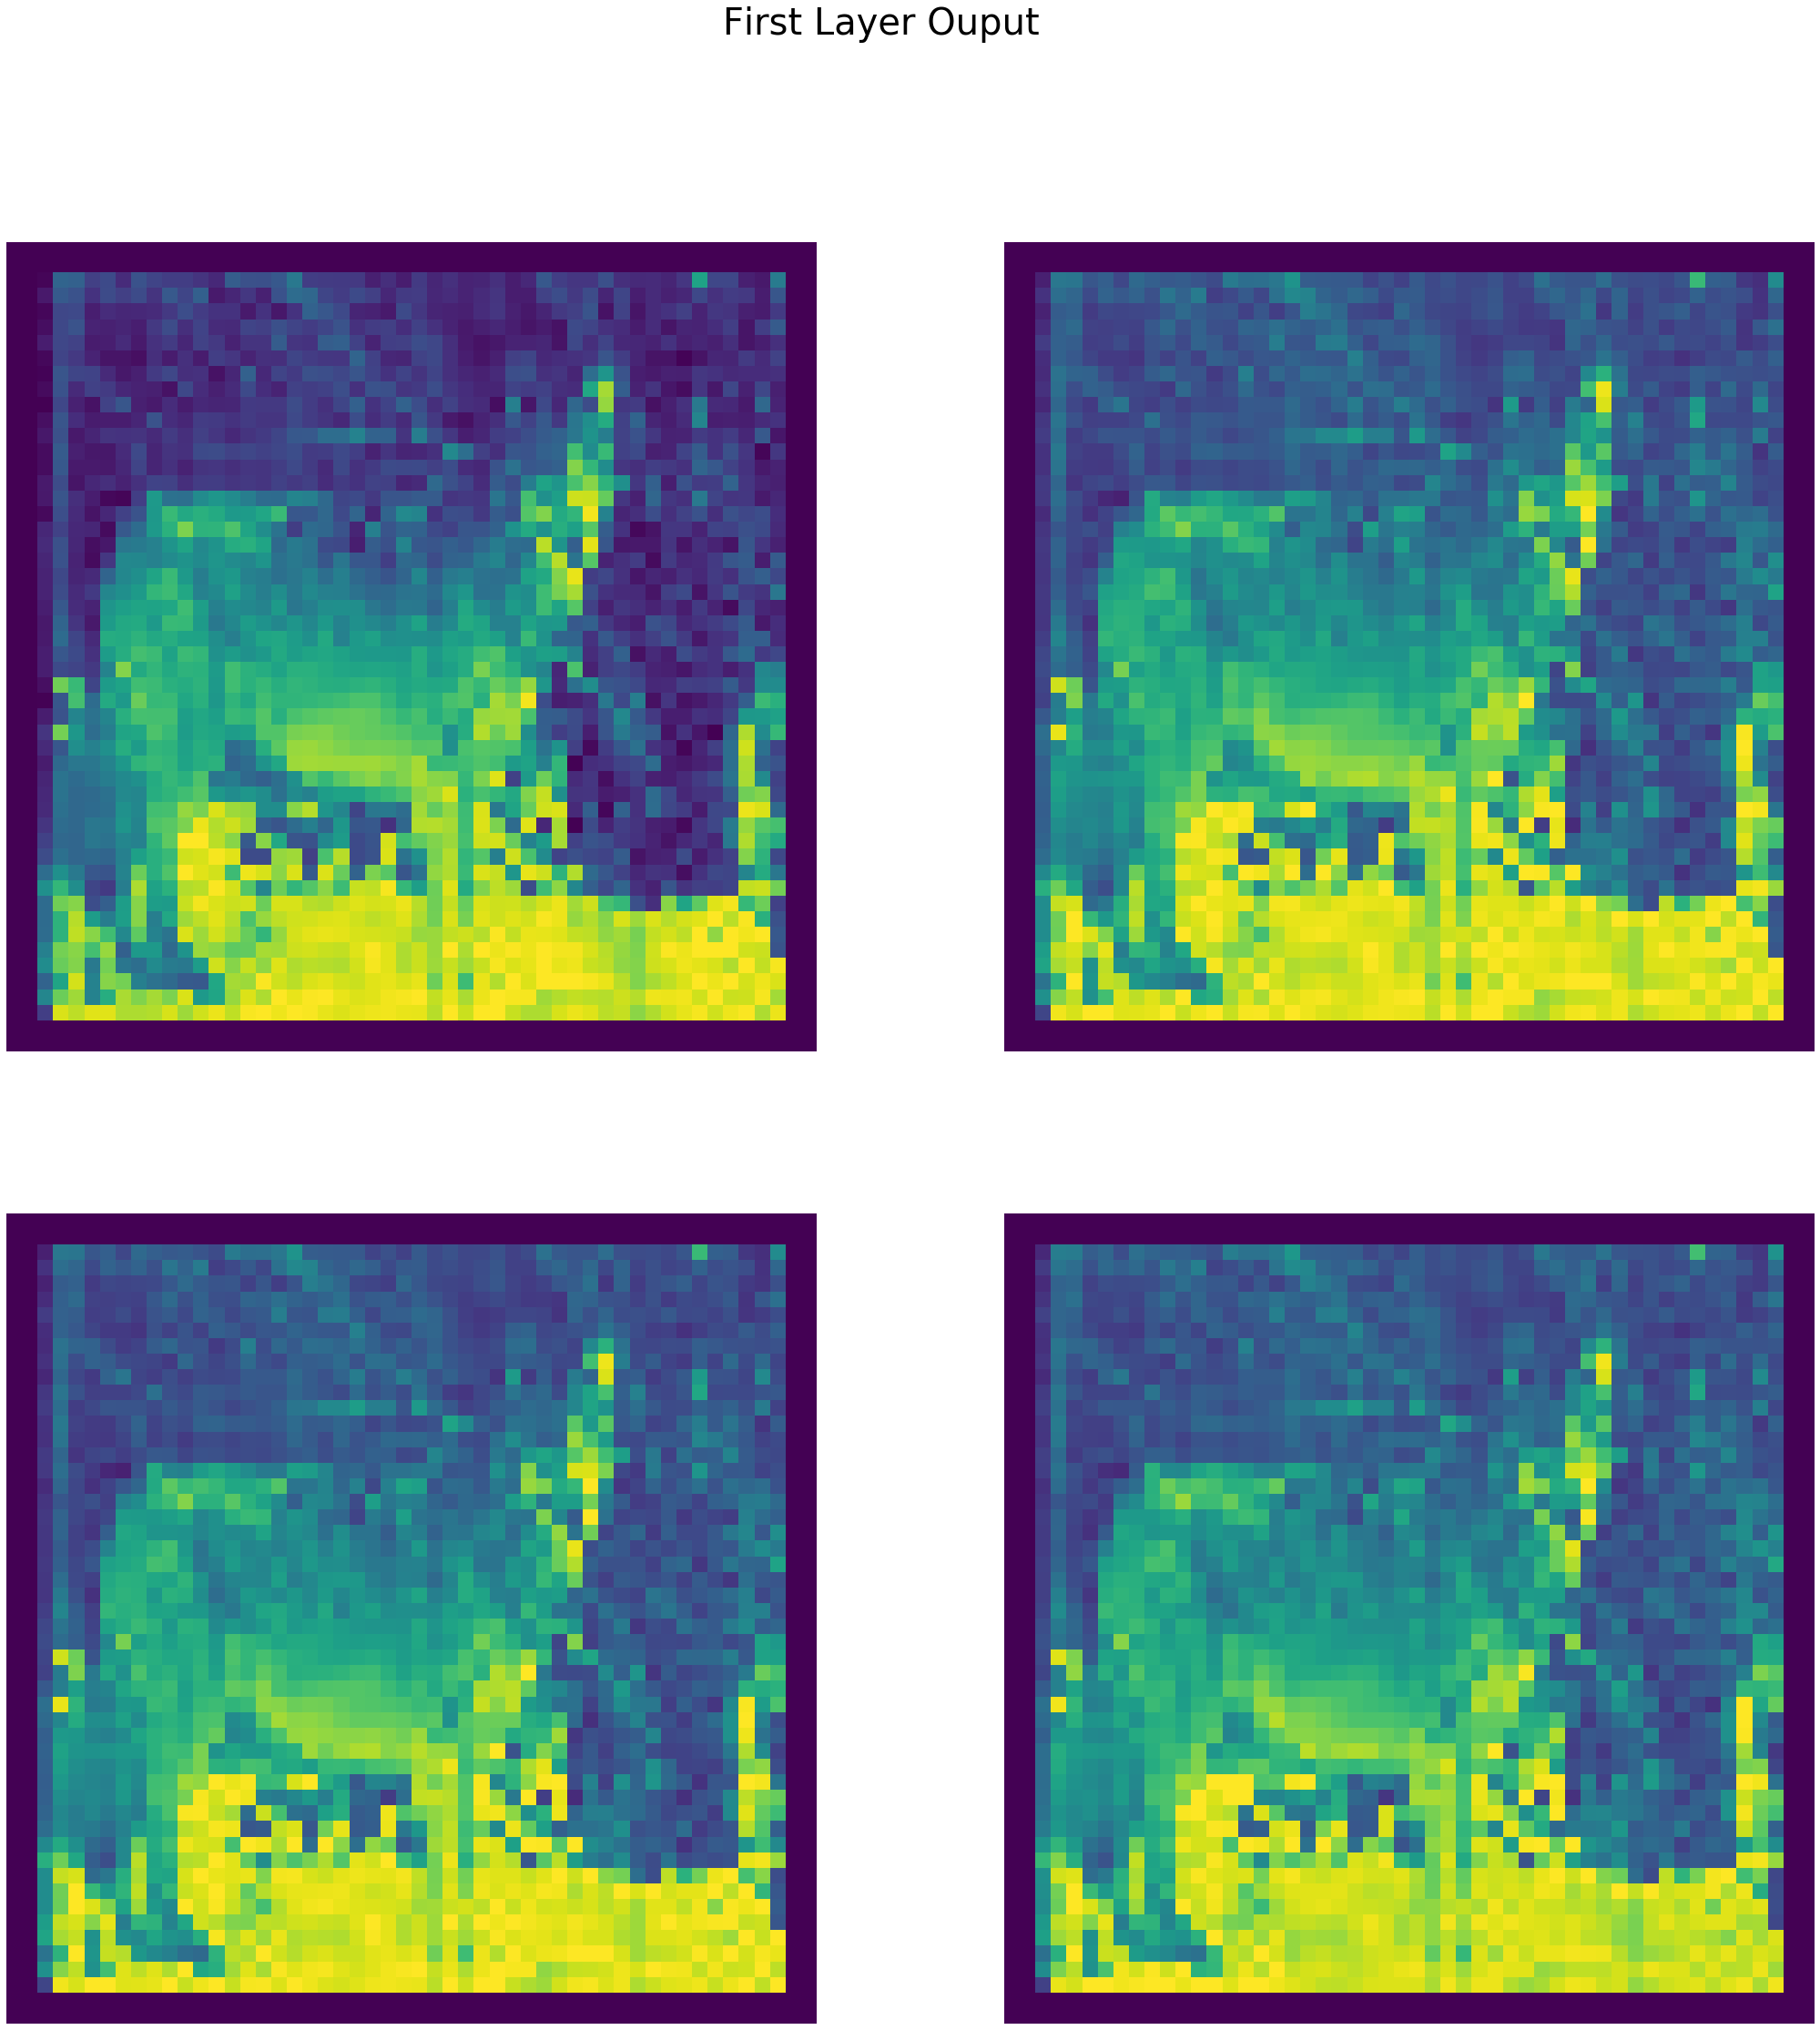

In [22]:
fig,ax=plt.subplots(2,2,figsize=(36,36))
for i in range(2):
    for j in range(2):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[0]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("First Layer Ouput",fontsize=40)
plt.show()

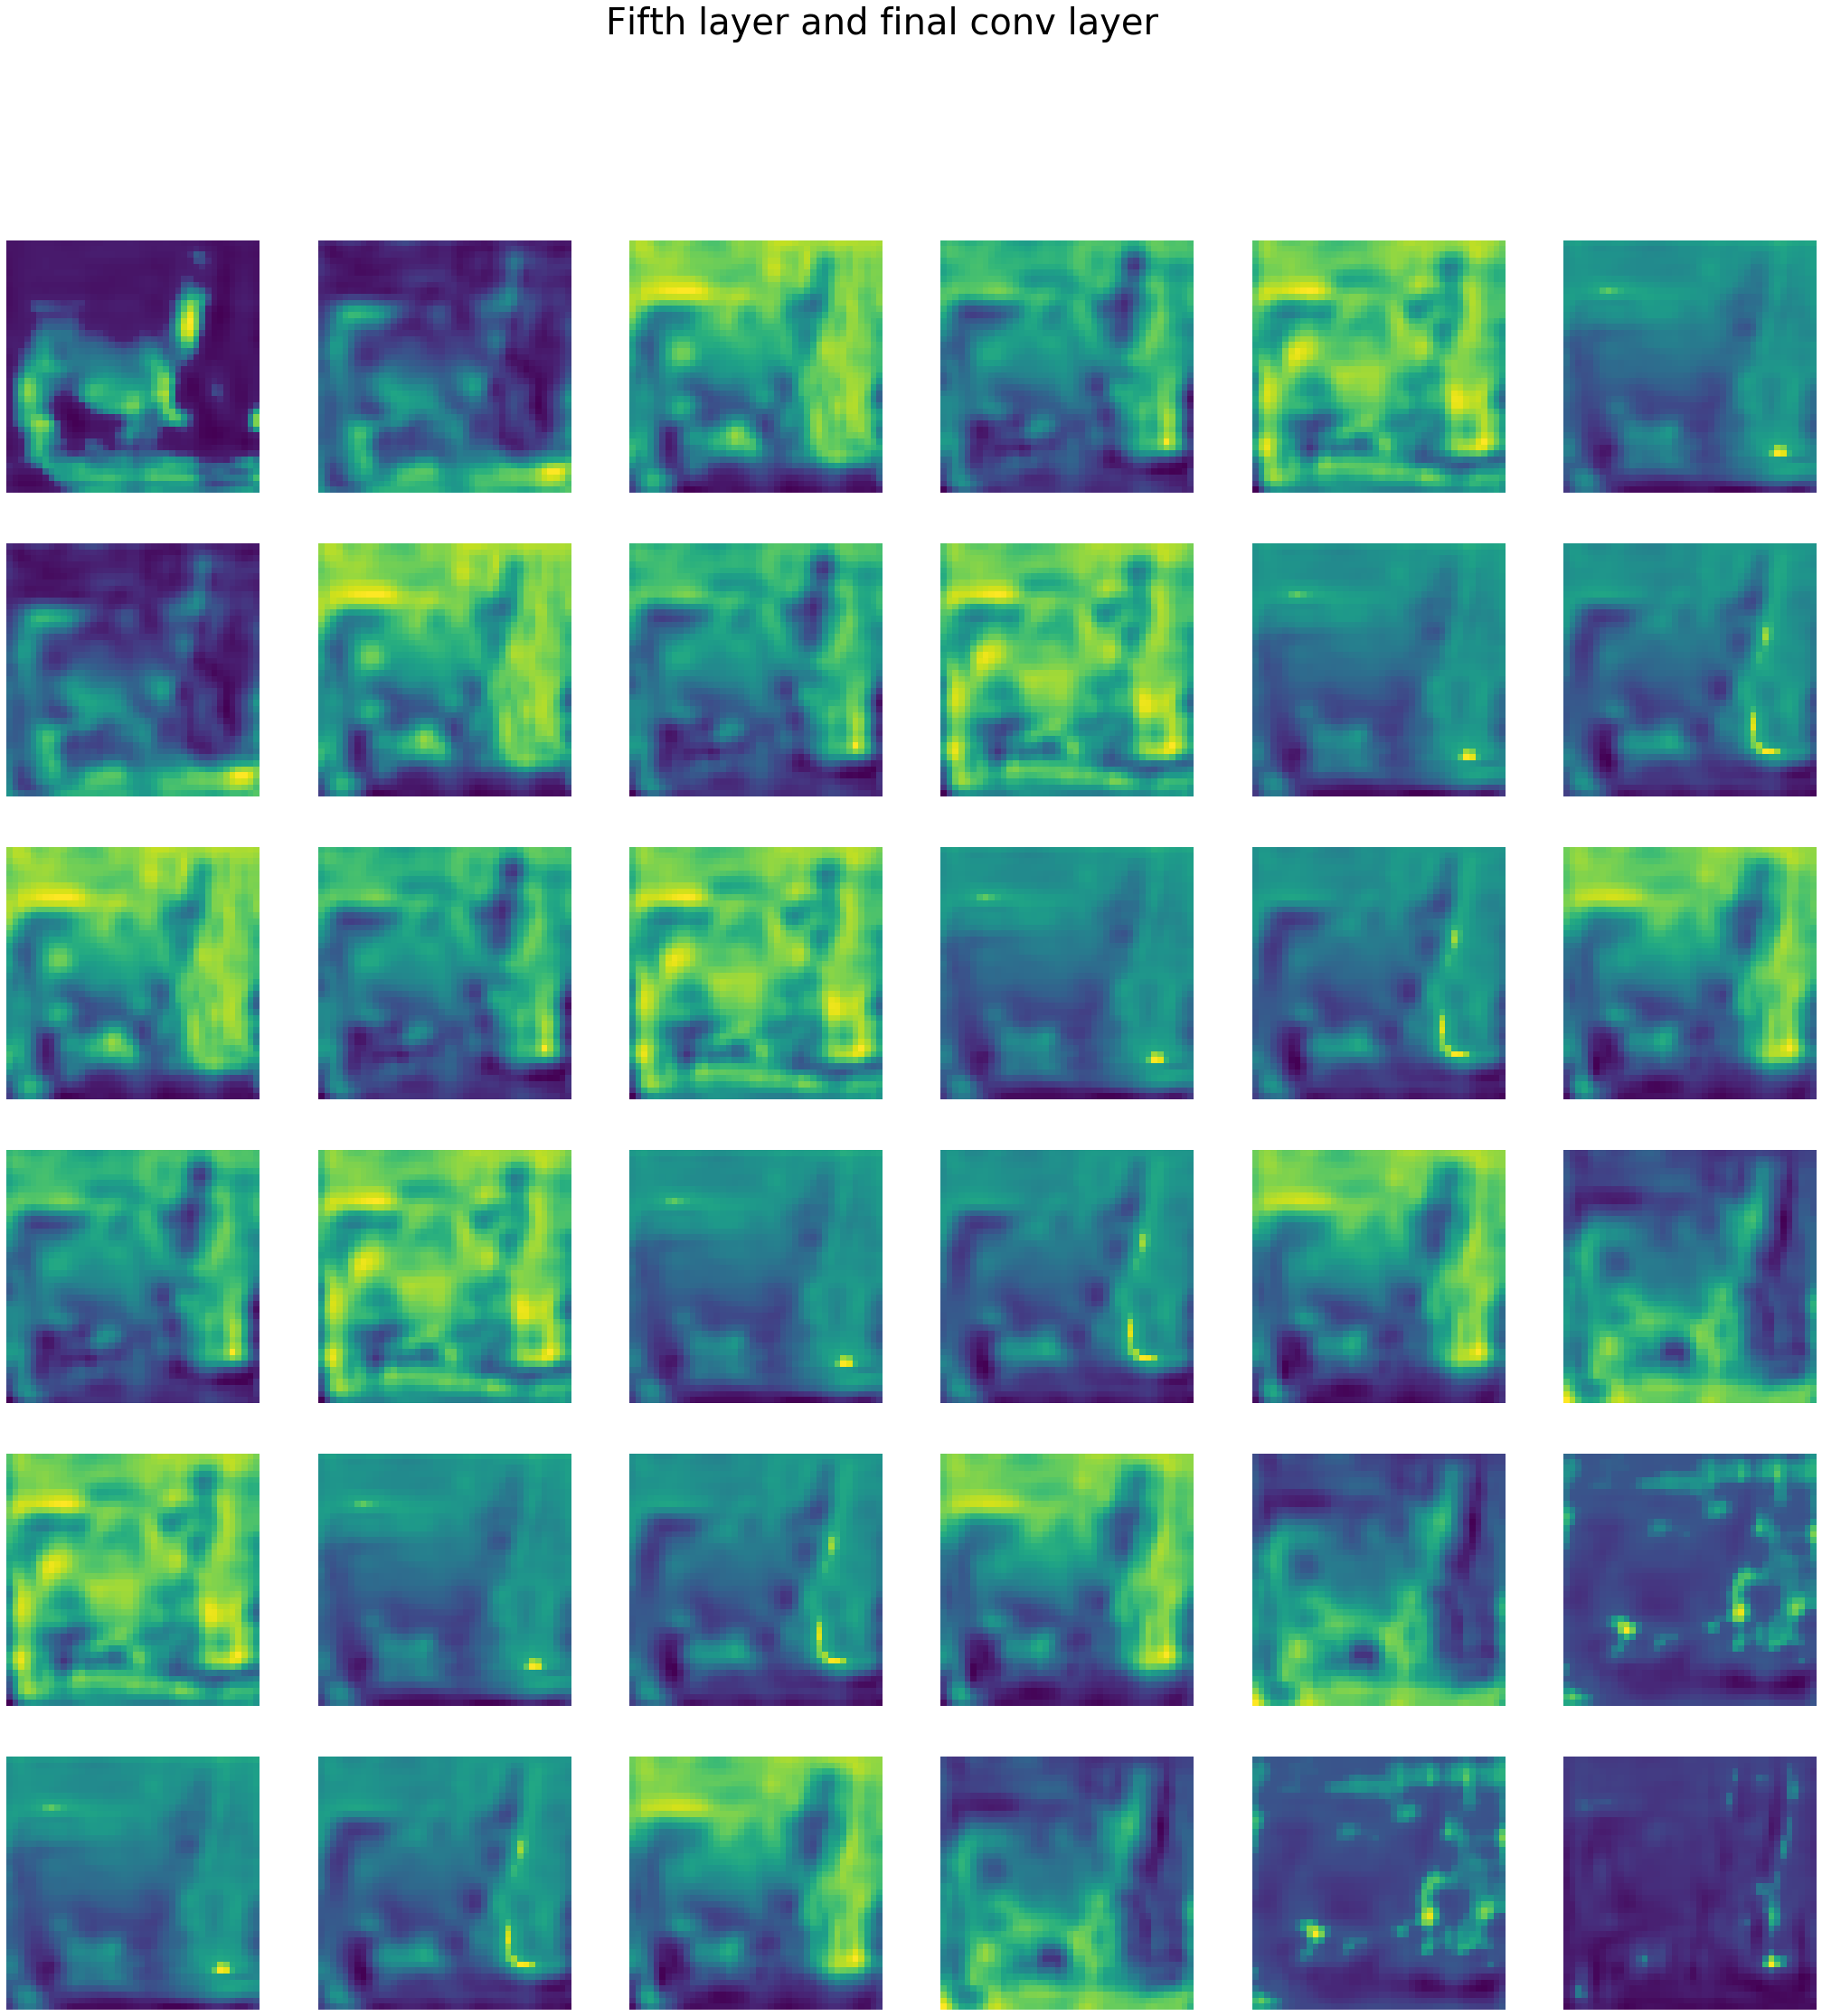

In [23]:
fig,ax=plt.subplots(6,6,figsize=(36,36))
for i in range(6):
    for j in range(6):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[-6]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("Fifth layer and final conv layer",fontsize=40)
plt.show()

C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\0\000_99.jpg


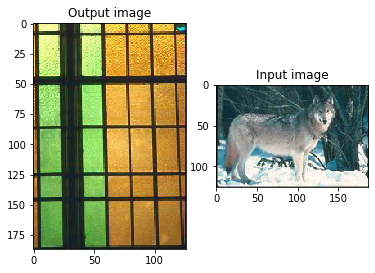

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
value = test_image[0]

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"
#path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\67"
image = "002_201.jpg"
def image_check_output(path, val, image):
    ###HER WE NEED TO GIVE INPUT AS A MANUAL BY SEEING THE Output of the Model
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,8))
    #print(fig, ax)
    li = [image for image in os.listdir(path+"\\"+str(val)+"\\") if image.endswith(".jpg")]
    #print(path+"\\"+str(val)+"\\"+li[0])
    img = mpimg.imread(path+"\\"+str(val)+"\\"+li[0])
    #print("Out put image...........")
    ax1.imshow(img)
    ax1.axis("on")
    ax1.title.set_text("Output image")
    
    image_in = mpimg.imread(image)
    #print("Input Image.............", image)
    ax2.imshow(image_in)
    ax2.axis("on")
    ax2.title.set_text("Input image")
    
image_check_output(path, value, image)

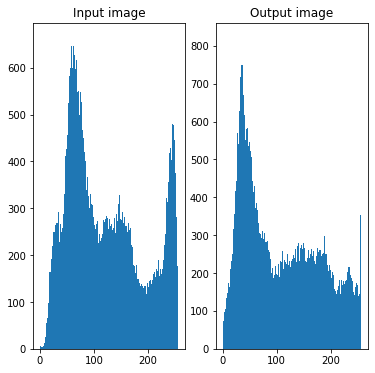

In [31]:
#Histograms for the images 
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"
value = test_image[0]

def final_hist(path, val):
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,6))
    
    img = cv2.imread('002_201.jpg',1)
    img1_list = [img.ravel()]
    ax1.hist(img.ravel(),256,[0,256])
    ax1.axis("on")
    ax1.title.set_text("Input image")
    
    li = [image for image in os.listdir(path+"\\"+str(val)+"\\") if image.endswith(".jpg")]
    #print(path+"\\"+str(val)+"\\"+li[0])
    img2 = cv2.imread(path+"\\"+str(val)+"\\"+li[0])
    img_list = [img2.ravel()]
    ax2.hist(img2.ravel(),256,[0,256])
    ax2.axis("on")
    ax2.title.set_text("Output image")
    
    return img_list, img1_list
        
img_list, img1_list = final_hist(path, value)

##Here similarity image calculated by the input and the output of the image and there histograms

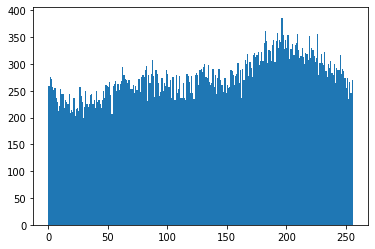

In [51]:
sub_list = []
for i in range(len(img_list)):
    sub_list.append((img_list[i]-img1_list[i]))


plt.hist(sub_list,256,[0,256])
plt.show()